Download the Iris flower dataset or any other dataset into a
DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris).
Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric,
nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to
illustrate the feature distributions.
3. 4. Create a box plot for each feature in the dataset.
Compare distributions and identify outliers.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

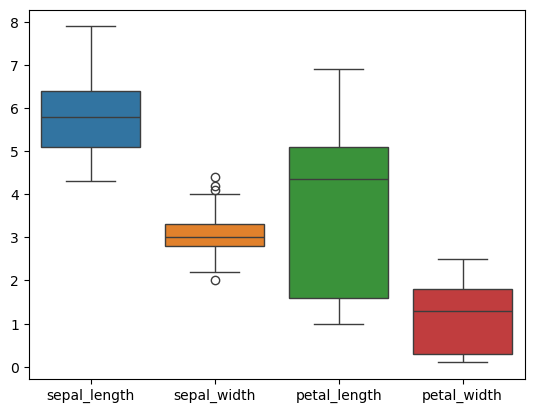

In [5]:
sns.boxplot(data = df)

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
def IQR_outliers(df , feature):
    q1 = np.percentile(df[feature] , 25)
    q3 = np.percentile(df[feature] , 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df = IQR_outliers(df , "sepal_length")
df = IQR_outliers(df , "sepal_width")
df = IQR_outliers(df , "petal_length")
df = IQR_outliers(df , "petal_width")


<Axes: >

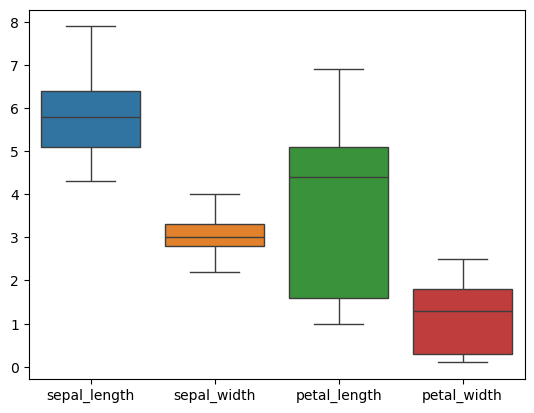

In [9]:
sns.boxplot(data = df)

<Axes: xlabel='petal_width', ylabel='Count'>

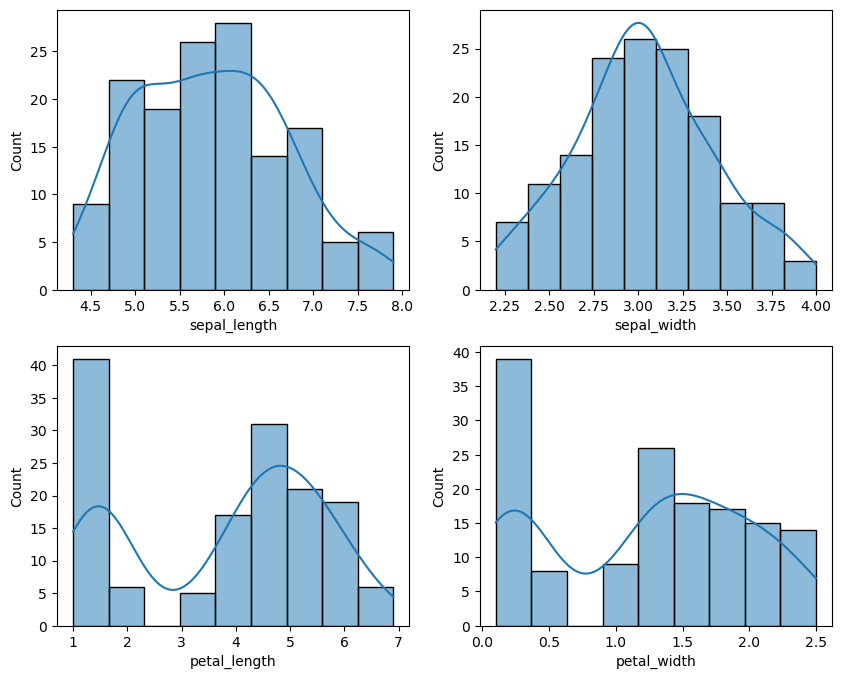

In [15]:
fig , axes = plt.subplots(2 , 2 , figsize = (10 , 8))
sns.histplot(data = df , x = "sepal_length" , ax= axes[0][0] , kde = True)
sns.histplot(data = df , x = "sepal_width" , ax= axes[0][1], kde = True)
sns.histplot(data = df , x = "petal_length" , ax= axes[1][0], kde = True)
sns.histplot(data = df , x = "petal_width" , ax= axes[1][1], kde = True)

<Axes: xlabel='species', ylabel='sepal_length'>

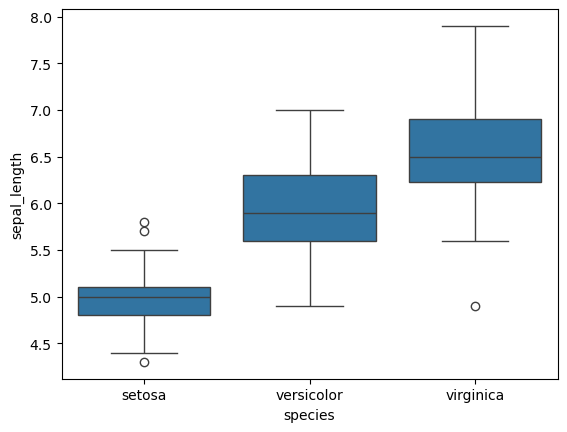

In [17]:
sns.boxplot(data = df , x="species", y="sepal_length")

<Axes: xlabel='species', ylabel='petal_width'>

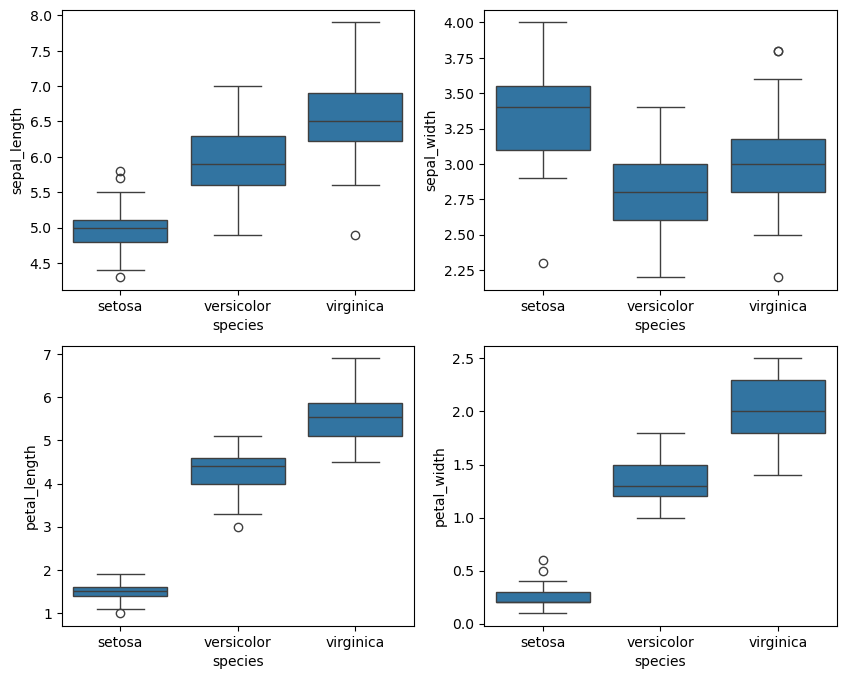

In [19]:
fig , axes = plt.subplots(2 , 2 , figsize = (10 , 8))
sns.boxplot(x="species", y="sepal_length", data=df , ax = axes[0][0])
sns.boxplot(x="species", y="sepal_width", data=df, ax = axes[0][1])
sns.boxplot(x="species", y="petal_length", data=df, ax = axes[1][0])
sns.boxplot(x="species", y="petal_width", data=df, ax = axes[1][1])